In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

# 시간 관련
import time

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# 파일 경로
file_path = 'data/청구입금정보_with_segment.csv'

# 제거할 컬럼 목록
drop_columns = [
    '대표결제방법코드',
    '대표청구지고객주소구분코드',
    '대표청구서수령지구분코드',
    '청구서수령방법',
    '포인트_잔여포인트_B0M',
    '기준년월',
    'ID'
]

# CSV 파일 불러오기
df = pd.read_csv(file_path)

# 컬럼 제거
df.drop(columns=drop_columns, inplace=True)

In [3]:
display(df)

,대표결제일,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,포인트_마일리지_건별_R3M,포인트_포인트_건별_B0M,...,상환개월수_결제일_R6M,상환개월수_결제일_R3M,선결제건수_R6M,선결제건수_R3M,연체건수_R6M,연체건수_R3M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,혜택수혜금액,Segment
0,27,1,1,1,12226,46588,88693,0,0,1444,...,5,3,0,0,1,0,3,0,0,D
1,13,1,1,1,5834,10530,16861,0,0,0,...,6,3,0,0,0,0,0,0,0,E
2,1,1,1,1,21866,85931,165221,0,0,2305,...,6,3,0,0,0,0,121,0,50,C
3,5,1,1,1,16356,61518,127371,0,0,1452,...,5,3,2,0,0,0,3,0,2,D
4,13,0,1,1,0,0,155,0,0,0,...,1,1,0,0,0,0,0,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E
2399996,20,1,1,1,14402,37515,99849,0,0,3339,...,6,3,0,0,0,0,164,0,53,D
2399997,20,1,1,1,5731,22274,41073,0,0,0,...,6,3,0,0,0,0,0,0,0,C
2399998,20,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,E


### 할인건수_R3M 인코딩

In [5]:
display(df['할인건수_R3M'].value_counts())

# 매핑 딕셔너리 정의
discount_mapping = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
    "40회 이상": 40
}

# 매핑 적용
df["할인건수_R3M"] = df["할인건수_R3M"].map(discount_mapping)

# 결과 확인
display(df[["할인건수_R3M"]].head())

할인건수_R3M
1회 이상     2142271
10회 이상     196651
20회 이상      53009
30회 이상       8065
40회 이상          4
Name: count, dtype: int64

,할인건수_R3M
0,1
1,1
2,1
3,1
4,1


### 할인건수_B0M 인코딩

In [7]:
display(df['할인건수_B0M'].value_counts())

# 매핑 딕셔너리 정의
discount_mapping = {
    "1회 이상": 1,
    "10회 이상": 10
}

# 매핑 적용
df["할인건수_B0M"] = df["할인건수_B0M"].map(discount_mapping)

# 결과 확인
print(df["할인건수_B0M"].head())

할인건수_B0M
1회 이상     2388828
10회 이상      11172
Name: count, dtype: int64

0    1
1    1
2    1
3    1
4    1
Name: 할인건수_B0M, dtype: int64


### vif 계산해서 기간 겹치는 컬럼 중 값 높은 것 제거

In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 1. 사용할 컬럼 목록
vif_columns = [
    "마일_적립포인트_R12M", "마일_적립포인트_R3M",
    "마일_이용포인트_R12M", "마일_이용포인트_R3M",
    "할인건수_B0M", "할인금액_청구서_R3M", "할인금액_청구서_B0M",
    "상환개월수_결제일_R6M", "상환개월수_결제일_R3M",
    "선결제건수_R6M", "선결제건수_R3M",
    "연체건수_R6M", "연체건수_R3M"
]

# 2. 해당 컬럼만 추출
vif_df = df[vif_columns].copy()

# 3. 결측치 처리 (예: 0 또는 평균으로 대체)
vif_df = vif_df.fillna(0)

# 4. 스케일링 (VIF 계산 전 권장됨)
scaler = StandardScaler()
vif_scaled = scaler.fit_transform(vif_df)

# 5. VIF 계산
vif_result = pd.DataFrame()
vif_result["Feature"] = vif_columns
vif_result["VIF"] = [variance_inflation_factor(vif_scaled, i) for i in range(vif_scaled.shape[1])]

# 6. 결과 출력
print(vif_result.sort_values(by="VIF", ascending=False))

          Feature        VIF
2   마일_이용포인트_R12M  35.260292
3    마일_이용포인트_R3M  25.239422
5    할인금액_청구서_R3M  14.344385
6    할인금액_청구서_B0M  14.204501
0   마일_적립포인트_R12M  12.654215
7   상환개월수_결제일_R6M  10.931246
8   상환개월수_결제일_R3M  10.910018
9       선결제건수_R6M   7.587862
10      선결제건수_R3M   7.566020
12       연체건수_R3M   7.084210
11       연체건수_R6M   7.048262
1    마일_적립포인트_R3M   4.527164
4        할인건수_B0M   1.080219


### 피처 선택
- importance 사용하는 방법
- 머신러닝을 수행할 때 학습에 참여할 피처 선택 방법은 다음과 같습니다
- 결과데이터와 상관관계 보는 방법
- ANOVA, 카이제곱 확인
- catboost로 importance 측정
- RandomForest로 importance 측정

In [11]:
numeric_cols = [
    "마일_적립포인트_R12M", "마일_적립포인트_R3M",
    "마일_이용포인트_R12M", "마일_이용포인트_R3M",
    "할인건수_B0M", "할인금액_청구서_R3M", "할인금액_청구서_B0M",
    "상환개월수_결제일_R6M", "상환개월수_결제일_R3M",
    "선결제건수_R6M", "선결제건수_R3M",
    "연체건수_R6M", "연체건수_R3M"
]

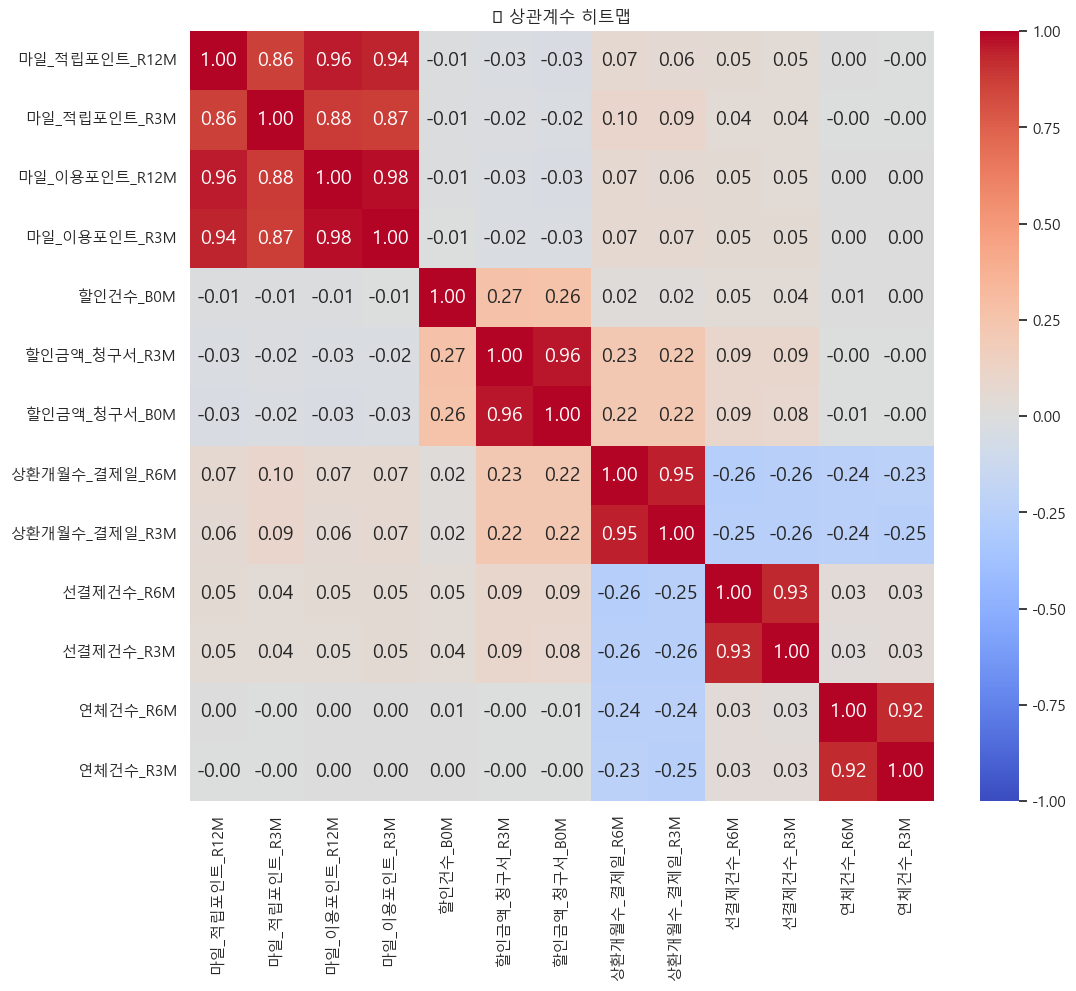

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산 (수치형만)
corr = df[numeric_cols].corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmax=1, vmin=-1)
plt.title("📊 상관계수 히트맵")
plt.show()

In [13]:
# 제거 대상 컬럼 목록
drop_columns = [
    "마일_적립포인트_R12M",
    "마일_이용포인트_R12M",
    "할인금액_청구서_R3M",
    "할인금액_청구서_B0M",
    "상환개월수_결제일_R6M",
    "상환개월수_결제일_R3M",
    "선결제건수_R6M",
    "선결제건수_R3M",
    "연체건수_R6M",
    "연체건수_R3M"
]

# 제거 수행
df_reduced = df.drop(columns=drop_columns)

print("✅ 제거 후 컬럼 수:", df_reduced.shape[1])

✅ 제거 후 컬럼 수: 30


### 포인트 관련 기간 VIF 계수 확인

In [15]:
vif_cols = [
    "포인트_마일리지_건별_B0M", "포인트_마일리지_건별_R3M",
    "포인트_포인트_건별_B0M", "포인트_포인트_건별_R3M",
    "포인트_마일리지_월적립_B0M", "포인트_마일리지_월적립_R3M",
    "포인트_포인트_월적립_B0M", "포인트_포인트_월적립_R3M",
    "포인트_적립포인트_R12M", "포인트_적립포인트_R3M",
    "포인트_이용포인트_R12M", "포인트_이용포인트_R3M"
]

In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# 1. 필요 컬럼만 선택
X = df[vif_cols].copy()

# 2. 결측치 제거 (혹은 채우기)
X = X.dropna()

# 3. 스케일링 (VIF 계산은 스케일 영향을 받음)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 5. 결과 출력
print(vif_data.sort_values(by="VIF", ascending=False))

             Feature        VIF
0    포인트_마일리지_건별_B0M  73.769471
1    포인트_마일리지_건별_R3M  73.732392
3     포인트_포인트_건별_R3M  34.159739
2     포인트_포인트_건별_B0M  30.377214
4   포인트_마일리지_월적립_B0M  25.949332
5   포인트_마일리지_월적립_R3M  25.940907
11     포인트_이용포인트_R3M  15.804691
9      포인트_적립포인트_R3M  10.347090
10    포인트_이용포인트_R12M   6.671042
8     포인트_적립포인트_R12M   5.964666
7    포인트_포인트_월적립_R3M   3.089876
6    포인트_포인트_월적립_B0M   2.452598


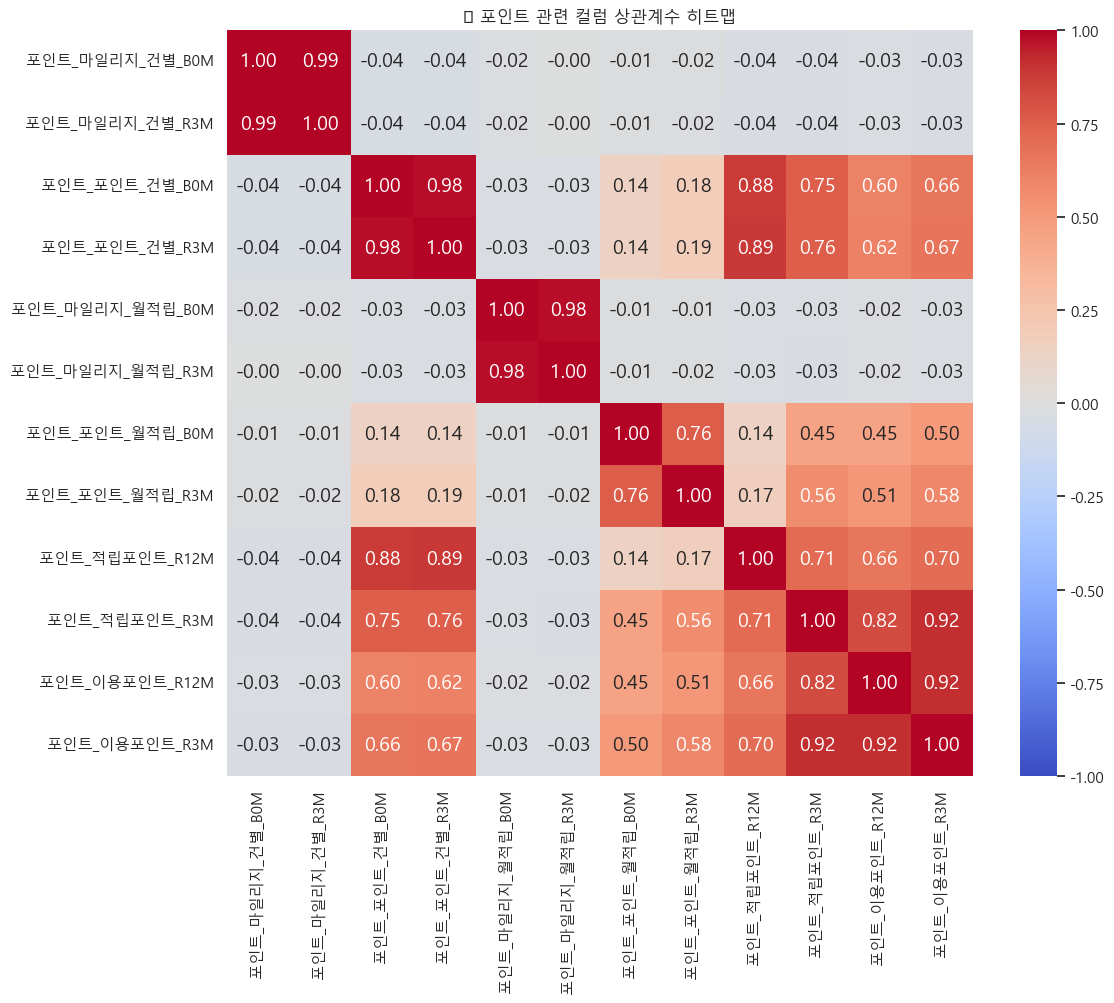

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
corr = df[vif_cols].corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, vmax=1, vmin=-1)
plt.title("📊 포인트 관련 컬럼 상관계수 히트맵")
plt.tight_layout()
plt.show()

In [18]:
# 제거할 컬럼 목록
drop_cols = [
    "포인트_마일리지_건별_R3M",
    "포인트_포인트_건별_R3M",
    "포인트_마일리지_월적립_R3M",
    "포인트_이용포인트_R3M"
]

# 컬럼 제거 수행
df_reduced = df.drop(columns=drop_cols)

print("✅ 제거 완료! 남은 컬럼 수:", df_reduced.shape[1])

✅ 제거 완료! 남은 컬럼 수: 36


### 최종적으로 사용할 것

In [20]:
import pandas as pd

# 1. 파일 경로 지정 및 불러오기
file_path = "data/청구입금정보_with_segment.csv"
df = pd.read_csv(file_path)

# 2. 매핑 딕셔너리 적용 전 value 확인
display(df['할인건수_R3M'].value_counts())
display(df['할인건수_B0M'].value_counts())

# 3. 매핑 딕셔너리 정의 및 적용
discount_mapping_r3m = {
    "1회 이상": 1,
    "10회 이상": 10,
    "20회 이상": 20,
    "30회 이상": 30,
    "40회 이상": 40
}
df["할인건수_R3M"] = df["할인건수_R3M"].map(discount_mapping_r3m)

discount_mapping_b0m = {
    "1회 이상": 1,
    "10회 이상": 10
}
df["할인건수_B0M"] = df["할인건수_B0M"].map(discount_mapping_b0m)

# 4. 제거할 컬럼 목록
drop_columns = [
    "대표결제방법코드", "대표청구지고객주소구분코드", "대표청구서수령지구분코드", "청구서수령방법",
    "포인트_마일리지_건별_R3M", "포인트_포인트_건별_R3M", "포인트_마일리지_월적립_R3M", "포인트_적립포인트_R3M",
    "포인트_이용포인트_R3M", "포인트_잔여포인트_B0M",
    "마일_적립포인트_R12M", "마일_이용포인트_R12M", "마일_이용포인트_R3M",
    "할인금액_B0M", "할인금액_청구서_R3M", "할인금액_청구서_B0M",
    "상환개월수_결제일_R6M", "상환개월수_결제일_R3M", "선결제건수_R6M", "선결제건수_R3M",
    "연체건수_R6M", "연체건수_R3M", "혜택수혜금액"
]

# 5. 컬럼 제거 후 저장
df_final = df.drop(columns=drop_columns)

# 6. 결과 저장 (세그먼트 인코딩 없이 저장)
df_final.to_csv("data/청구입금정보_최종전처리.csv", index=False, encoding="utf-8-sig")

print("✅ 최종 CSV 저장 완료! 파일명: data/청구입금정보_최종전처리.csv")

할인건수_R3M
1회 이상     2142271
10회 이상     196651
20회 이상      53009
30회 이상       8065
40회 이상          4
Name: count, dtype: int64

할인건수_B0M
1회 이상     2388828
10회 이상      11172
Name: count, dtype: int64

✅ 최종 CSV 저장 완료! 파일명: data/청구입금정보_최종전처리.csv


In [21]:
# 결과 확인용
check_point = pd.read_csv('data/청구입금정보_최종전처리.csv')
check_point

,기준년월,ID,대표결제일,청구서발송여부_B0,청구서발송여부_R3M,청구서발송여부_R6M,청구금액_B0,청구금액_R3M,청구금액_R6M,포인트_마일리지_건별_B0M,...,포인트_적립포인트_R12M,포인트_이용포인트_R12M,마일_적립포인트_R3M,마일_잔여포인트_B0M,할인건수_R3M,할인금액_R3M,할인건수_B0M,혜택수혜금액_R3M,포인트_마일리지_환산_B0M,Segment
0,201807,TRAIN_000000,27,1,1,1,12226,46588,88693,0,...,3460,4008,0,0,1,0,1,3,0,D
1,201807,TRAIN_000001,13,1,1,1,5834,10530,16861,0,...,0,0,0,0,1,0,1,0,0,E
2,201807,TRAIN_000002,1,1,1,1,21866,85931,165221,0,...,17135,8312,0,0,1,0,1,121,0,C
3,201807,TRAIN_000003,5,1,1,1,16356,61518,127371,0,...,6464,8815,0,0,1,0,1,3,0,D
4,201807,TRAIN_000004,13,0,1,1,0,0,155,0,...,0,0,0,0,1,0,1,0,0,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,25,0,0,0,0,0,0,0,...,2379,6971,0,0,1,0,1,0,0,E
2399996,201812,TRAIN_399996,20,1,1,1,14402,37515,99849,0,...,64696,59260,0,0,1,0,1,164,0,D
2399997,201812,TRAIN_399997,20,1,1,1,5731,22274,41073,0,...,0,0,0,0,1,0,1,0,0,C
2399998,201812,TRAIN_399998,20,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,E
